### DataSet Lazada https://drive.google.com/drive/folders/1-Vzi94sbb4yxKwbbp_yddJ4jYbEm8rDb?usp=drive_link¶

### POSTTEST 5
- Nama : Steven Alesandro Nesta
- NIM : 2109106113
- Informatika C1'21

### IMPORT LIBRARY

In [9]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score
import matplotlib.pyplot as plt

### Memuat dataset dari file CSV

In [16]:
dataset = pd.read_csv('dataset-reviews.csv')

### Mengurangi jumlah dataset dikarenakan jumlah data yang berlebih

In [17]:
dataset = pd.read_csv("dataset-reviews.csv")
dataset.drop(dataset.index[1500:202288], inplace=True)

# A. Supervised Learning

# A1. Implementasi Metode
# Support Vector Classifier (SVC) untuk Klasifik

In [18]:
X = dataset[['relevanceScore', 'upVotes']]  # Ganti dengan fitur sesuai dataset
y = dataset['rating']  # Ganti dengan label sesuai dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

# Linear Regression untuk Regresi

In [19]:
X = dataset[['relevanceScore', 'upVotes']]  # Ganti dengan fitur sesuai dataset
y = dataset['rating']  # Ganti dengan target sesuai dataset
lr_model = LinearRegression()
lr_model.fit(X, y)
y_pred_lr = lr_model.predict(X)
mae = mean_absolute_error(y, y_pred_lr)
mse = mean_squared_error(y, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred_lr)

# A2. Evaluasi Hasil
# Klasifikasi

In [20]:
cm_svc = confusion_matrix(y_test, y_pred_svc)
classification_rep_svc = classification_report(y_test, y_pred_svc)

C:\Users\LENOVO-GK\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO-GK\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO-GK\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

# Regresi
# Jelaskan hasil evaluasi regresi (mae, mse, rmse, r2) dalam markdown

# A3. Buat Plot
# Klasifikasi

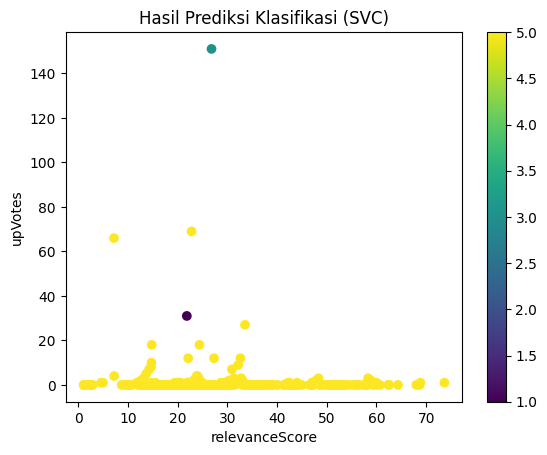

In [21]:
plt.scatter(X_test['relevanceScore'], X_test['upVotes'], c=y_pred_svc)
plt.colorbar()
plt.xlabel('relevanceScore')
plt.ylabel('upVotes')
plt.title('Hasil Prediksi Klasifikasi (SVC)')
plt.show()

# Regresi

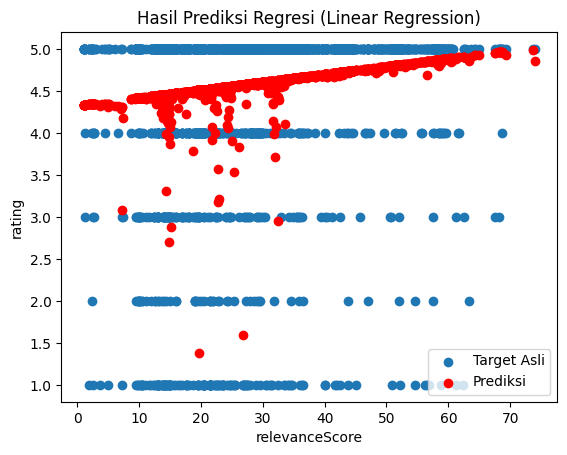

In [22]:
plt.scatter(X['relevanceScore'], y, label='Target Asli')
plt.scatter(X['relevanceScore'], y_pred_lr, label='Prediksi', c='r')
plt.xlabel('relevanceScore')
plt.ylabel('rating')
plt.legend()
plt.title('Hasil Prediksi Regresi (Linear Regression)')
plt.show()

# B. Unsupervised Learning

# B1. Implementasi Metode
# K-Means

In [23]:
X = dataset[['relevanceScore', 'upVotes']]  # Ganti dengan fitur sesuai dataset
kmeans = KMeans(n_clusters=5)  # Ganti dengan jumlah kluster yang sesuai
kmeans.fit(X)

C:\Users\LENOVO-GK\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

# B2. Evaluasi Hasil
# Tanpa Label Asli

In [24]:
silhouette = silhouette_score(X, kmeans.labels_)
davies_bouldin = davies_bouldin_score(X, kmeans.labels_)
calinski_harabasz = calinski_harabasz_score(X, kmeans.labels_)

# Dengan Label Asli

In [25]:
y_true = dataset['rating']  # Ganti dengan label asli sesuai dataset
adjusted_rand = adjusted_rand_score(y_true, kmeans.labels_)
normalized_mutual_info = normalized_mutual_info_score(y_true, kmeans.labels_)
homogeneity = homogeneity_score(y_true, kmeans.labels_)
completeness = completeness_score(y_true, kmeans.labels_)
v_measure = v_measure_score(y_true, kmeans.labels_)

# B3. Buat Plot
# Plot hasil clustering    

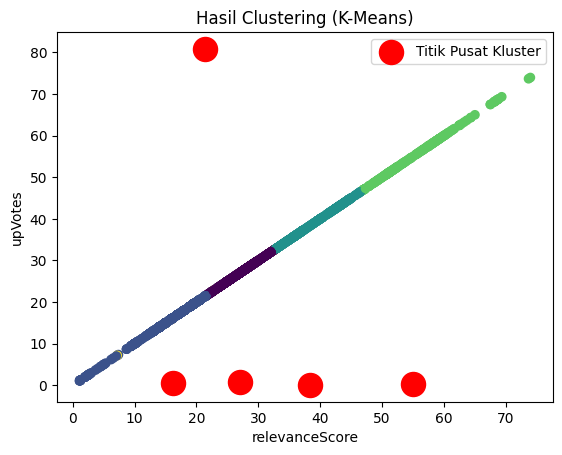

In [26]:
plt.scatter(X['relevanceScore'], X['relevanceScore'], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Titik Pusat Kluster')
plt.xlabel('relevanceScore')
plt.ylabel('upVotes')
plt.title('Hasil Clustering (K-Means)')
plt.legend()
plt.show()


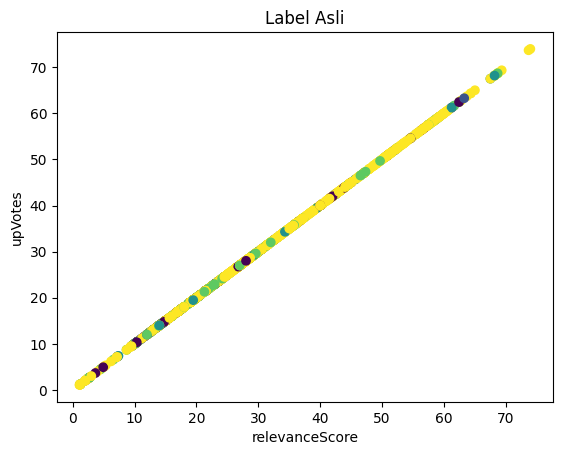

In [27]:
# Jika ada label asli, buat plot pembanding
plt.scatter(X['relevanceScore'], X['relevanceScore'], c=y_true)
plt.xlabel('relevanceScore')
plt.ylabel('upVotes')
plt.title('Label Asli')
plt.show()